In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################



directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


In [2]:
fixedRateBondDefinition={}
fixedRateBondDefinition["issueDate"]="2015-03-15"
fixedRateBondDefinition["maturityDate"]="2026-06-04"
fixedRateBondDefinition["frequency"]="Semiannual"
fixedRateBondDefinition["coupon"]=0.0085
fixedRateBondDefinition["calendar"]="UnitedStates"
fixedRateBondDefinition["currency"]="TRY"
fixedRateBondDefinition["dateGeneration"]="Backward"
fixedRateBondDefinition["dayCounter"]="Actual360"
fixedRateBondDefinition["businessDayConvention"]="ModifiedFollowing"
fixedRateBondDefinition["maturityDateConvention"]="ModifiedFollowing"
fixedRateBondDefinition["redemption"]=100
fixedRateBondDefinition["endOfMonth"]=True
fixedRateBondDefinition

{'issueDate': '2015-03-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Semiannual',
 'coupon': 0.0085,
 'calendar': 'UnitedStates',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True}

In [3]:
instruments={}
depo={}
irs={}

depo["businessDayConvention"]="Following"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

irs["businessDayConvention"]="Following"      # if it is null, default value is used 
irs["dayCounter"]="Actual360"                         # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'Following', 'dayCounter': 'Actual360'},
 'IRS': {'businessDayConvention': 'Following',
  'dayCounter': 'Actual360',
  'frequency': 'Semiannual'}}

In [4]:
# Fix parameters for building yield curve
yieldcurveconfig={
      "name": "TRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }
yieldcurveconfig

{'name': 'TRYZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360'},
  'IRS': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360',
   'frequency': 'Semiannual'}}}

In [5]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "risk_factors",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "USD",
  "riskMethod": "HISTORICAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
    {
      "trade_id": "FRB1000",
      "calculation_type": "fixed_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Sell",
      "discountCurve": "TRYZC",
      "fixedRateBondDefinition": fixedRateBondDefinition
    },
  ],
  "curves": [yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [6]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [7]:
pd.DataFrame(result)

,TRYUSD,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.136229,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001585,0.002114,0.002275,...,0.008832,0.009861,0.010747,0.012139,0.013624,0.014935,0.015574,0.015776,0.016079,0.016262
2021-01-27,0.135194,0.001225,0.001225,0.001225,0.001225,0.001225,0.001225,0.001576,0.002184,0.002344,...,0.008982,0.010019,0.010860,0.012316,0.013793,0.015146,0.015739,0.015972,0.016320,0.016529
2021-01-26,0.136093,0.001275,0.001275,0.001275,0.001275,0.001275,0.001275,0.001583,0.002128,0.002329,...,0.008822,0.009885,0.010811,0.012258,0.013726,0.015063,0.015650,0.015965,0.016438,0.016721
2021-01-25,0.134971,0.001248,0.001248,0.001248,0.001248,0.001248,0.001248,0.001604,0.002152,0.002359,...,0.009299,0.010343,0.011274,0.012763,0.014248,0.015616,0.016219,0.016513,0.016956,0.017221
2021-01-22,0.134869,0.001300,0.001300,0.001300,0.001300,0.001300,0.001300,0.001655,0.002177,0.002344,...,0.009252,0.010331,0.011346,0.012727,0.014271,0.015714,0.016277,0.016541,0.016938,0.017175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.167101,0.016608,0.016608,0.016608,0.016608,0.016608,0.016608,0.017285,0.017473,0.017376,...,0.013914,0.014186,0.014523,0.015107,0.015767,0.016456,0.016698,0.016758,0.016847,0.016900
2020-01-31,0.167163,0.016539,0.016539,0.016539,0.016539,0.016539,0.016539,0.017387,0.017594,0.017556,...,0.014633,0.014980,0.015243,0.015802,0.016436,0.017072,0.017328,0.017294,0.017242,0.017210
2020-01-30,0.167434,0.016442,0.016442,0.016442,0.016442,0.016442,0.016442,0.017598,0.017731,0.017713,...,0.014741,0.015088,0.015405,0.015910,0.016511,0.017125,0.017335,0.017391,0.017475,0.017525
2020-01-29,0.167878,0.016489,0.016489,0.016489,0.016489,0.016489,0.016489,0.017614,0.017656,0.017632,...,0.015307,0.015633,0.015918,0.016448,0.017098,0.017700,0.017909,0.017907,0.017904,0.017902


In [8]:
lst=[]
for key,values in result.get('TRYUSD').items():
    lst.append({"Date":key,"value":values})
rf_fx=pd.DataFrame(lst).set_index('Date')

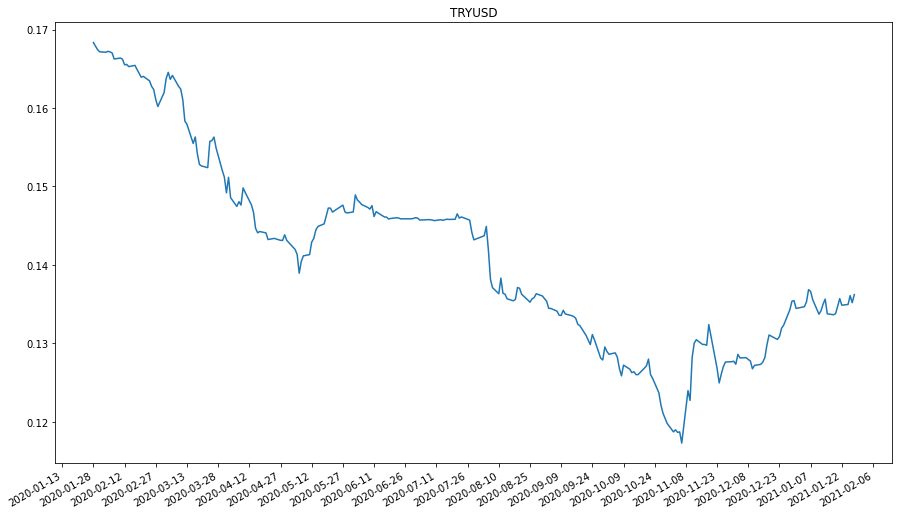

In [9]:
converted_dates = list(map(datetime.datetime.strptime, rf_fx.index, len( rf_fx.index)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates,  rf_fx.values)
plt.title("TRYUSD")
plt.show()

In [10]:
riskdata["valuationCurrency"]="TRY"
riskdata["tasks"][0]["fixedRateBondDefinition"]["currency"]="USD"

In [11]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [12]:
lst=[]
for key,values in result.get('USDTRY').items():
    lst.append({"Date":key,"value":values})
rf_fx=pd.DataFrame(lst).set_index('Date')

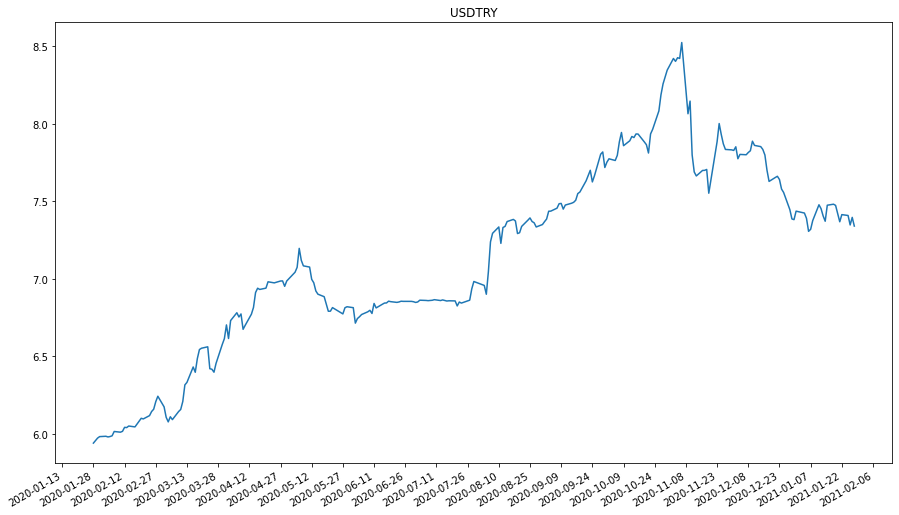

In [13]:
converted_dates = list(map(datetime.datetime.strptime, rf_fx.index, len( rf_fx.index)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates,  rf_fx.values)
plt.title("USDTRY")
plt.show()